<a href="https://colab.research.google.com/github/ulwanfaqih/Portofolio/blob/main/Model_Prediksi_Dari_Data_Ekspor_Kacang_Kedelai_dengan_Metode_Long_Short_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Prediksi Dari Data Ekspor Kacang Kedelai dengan Metode Long Short Term Memory**
oleh : Muhammad Ulwan Faqih


---



Tujuan : Melihat Prediksi Laju Pertumbuhan Ekspor Kacang Kedelai di Indonesia

Proses - proses yang dilakukan :
1. Pre-Processing
2. Membangun Model
3. Analisis Model
4. Evaluasi Model


---



# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

# DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Data/
data_ekspor = pd.read_excel(r'Soybean Indo.xlsx')

Mounted at /content/drive
/content/drive/MyDrive/Data


In [3]:
data_ekspor.head()

,Date,UBCurr,UBLast,AECurr,AELast,TCCurr,TCLast,% change,next year
0,2006-05-18,113.6,43.8,944.7,858.8,1058.0,903.0,17.250166,NaN
1,2006-05-25,58.9,43.8,1010.7,858.8,1070.0,903.0,18.502105,NaN
2,2006-06-01,57.8,43.8,1011.8,858.8,1070.0,903.0,18.502105,NaN
3,2006-06-08,57.0,4.8,1012.6,900.8,1070.0,906.0,18.109541,0.0
4,2006-06-15,61.5,4.8,1012.6,924.1,1074.0,929.0,15.631392,0.0


Data yang digunakan merupakan data sekunder ekspor kacang kedelai
Indonesia tahun 2006-2016 yang diperoleh dari data.world.com yang terdiri dari 9 variabel dan 587 baris data

Variabel - variabel tersebut adalah :
1. Date =
2. UBCurr =
3. UB Last = 
4. AECurr =
5. AELast =
6. TCCurr =
7. TCLast =
8. % change =
9. next year =


---




In [4]:
data_ekspor.info()
data_ekspor.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       587 non-null    datetime64[ns]
 1   UBCurr     534 non-null    float64       
 2   UBLast     534 non-null    float64       
 3   AECurr     533 non-null    float64       
 4   AELast     534 non-null    float64       
 5   TCCurr     534 non-null    float64       
 6   TCLast     534 non-null    float64       
 7   % change   534 non-null    float64       
 8   next year  154 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 41.4 KB


(587, 9)

Karena ujuan kita membuat model, dan masih banyak ditemukan ketidakrapihan data, maka **selanjutnya akan dilakukan Pre-Processing**


---



# Pre-Processing

mengecek dan menghitung jumlah missing value masing-masing variabel

In [5]:
#Mengecek Missing Value
print(data_ekspor.isnull().sum())
print(data_ekspor.isnull().sum().sum())

Date           0
UBCurr        53
UBLast        53
AECurr        54
AELast        53
TCCurr        53
TCLast        53
% change      53
next year    433
dtype: int64
805


**Akan dilakukan penanganan Missing Value**


---



count     534.000000
mean      816.376030
std       563.877828
min         0.000000
25%       362.750000
50%       767.750000
75%      1171.775000
max      5216.700000
Name: AELast, dtype: float64
0    948.6
dtype: float64


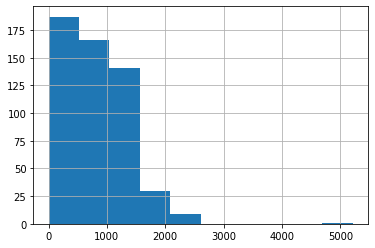

In [6]:
print(data_ekspor['AELast'].describe())
print(data_ekspor['AELast'].mode())
data_ekspor['AELast'].hist()

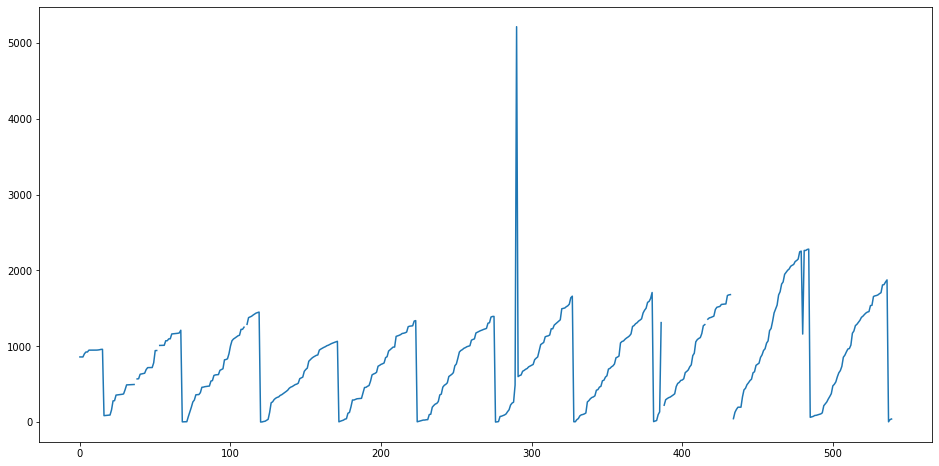

In [7]:
plt.figure(figsize=(16,8))
plt.plot(data_ekspor['AELast'], label='AELast Price')

In [8]:
data_baru=data_ekspor.iloc[:,4:5].values

In [9]:
data_baru

array([[8.5880e+02],
       [8.5880e+02],
       [8.5880e+02],
       [9.0080e+02],
       [9.2410e+02],
       [9.2410e+02],
       [9.4860e+02],
       [9.4860e+02],
       [9.4860e+02],
       [9.4860e+02],
       [9.4860e+02],
       [9.4910e+02],
       [9.5050e+02],
       [9.5370e+02],
       [9.5850e+02],
       [9.5950e+02],
       [8.4200e+01],
       [8.6600e+01],
       [8.9200e+01],
       [9.1100e+01],
       [9.2400e+01],
       [1.6000e+02],
       [2.7890e+02],
       [2.8190e+02],
       [3.5550e+02],
       [3.5810e+02],
       [3.6130e+02],
       [3.6410e+02],
       [3.6600e+02],
       [3.7080e+02],
       [4.2590e+02],
       [4.9000e+02],
       [4.9150e+02],
       [4.9270e+02],
       [4.9320e+02],
       [4.9410e+02],
       [4.9540e+02],
       [       nan],
       [5.6880e+02],
       [5.7150e+02],
       [6.3060e+02],
       [6.3460e+02],
       [6.3980e+02],
       [6.4390e+02],
       [6.9250e+02],
       [7.1790e+02],
       [7.1890e+02],
       [7.189

In [10]:
train_data=data_baru[0:495,0]
valid_data=data_baru[495:,0]

In [11]:
train_data, valid_data

(array([8.5880e+02, 8.5880e+02, 8.5880e+02, 9.0080e+02, 9.2410e+02,
        9.2410e+02, 9.4860e+02, 9.4860e+02, 9.4860e+02, 9.4860e+02,
        9.4860e+02, 9.4910e+02, 9.5050e+02, 9.5370e+02, 9.5850e+02,
        9.5950e+02, 8.4200e+01, 8.6600e+01, 8.9200e+01, 9.1100e+01,
        9.2400e+01, 1.6000e+02, 2.7890e+02, 2.8190e+02, 3.5550e+02,
        3.5810e+02, 3.6130e+02, 3.6410e+02, 3.6600e+02, 3.7080e+02,
        4.2590e+02, 4.9000e+02, 4.9150e+02, 4.9270e+02, 4.9320e+02,
        4.9410e+02, 4.9540e+02,        nan, 5.6880e+02, 5.7150e+02,
        6.3060e+02, 6.3460e+02, 6.3980e+02, 6.4390e+02, 6.9250e+02,
        7.1790e+02, 7.1890e+02, 7.1890e+02, 7.1890e+02, 7.8160e+02,
        9.4230e+02, 9.4380e+02,        nan, 1.0107e+03, 1.0118e+03,
        1.0126e+03, 1.0126e+03, 1.0725e+03, 1.0728e+03, 1.0972e+03,
        1.0982e+03, 1.1621e+03, 1.1642e+03, 1.1655e+03, 1.1676e+03,
        1.1710e+03, 1.1756e+03, 1.2111e+03, 2.4000e+00, 3.4000e+00,
        3.7000e+00, 4.3000e+00, 7.1700e+01, 1.32